# Titanic Tutorial by YouhanLee - 1st Try

타이타닉 데이터셋은 타이타닉에 승선한 사람들의 신상 정보를 활요하여 승성한 사람들의 생존 여부를 예측하는 모델을 생성하는 것이 목적이다.

`matplotlib` `seaborn` `plotly` `pandas` `numpy` `sklearn`

* **데이터셋 확인** : null data 존재 여부 확인
* **EDA** : 여러 피처들의 개별 분석 및 피처들 간의 상관관계를 확인. 이 때 시각화 툴을 사용
* **Feature Engineering** : 모델의 성능을 높이기 위해 피처들을 전처리하는 과정.    
  * *one-hot-encoding*, *class 분류*, *문자열 데이터 처리* 등이 여기서 이루어짐.
* **Model 설계** : `sklearn`, `pytorch`, `tensorflow` 등을 사용하여 모델 설계.
* **Model 학습 및 예측** : train 데이터를 가지고 모델을 학습시키고 test 데이터로 예측.
* **Model 평가** : 예측된 데이터를 보고 모델의 성능을 판단.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# msno library
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. 데이터셋 확인

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 다루고자 하는 피처는 `Pclass`, `Age`, `SibSp`, `Parch`. `Fare` 등이 있고, 예측하려는 target 피처는 `Survived`이다.
* `Pclass` : 티켓의 클래스 (이코노미, 퍼스트 같은 것)
* `SibSp` : 함께 탑승한 형제와 배우자의 수
* `Parch` : 함께 탑승한 부모와 아이의 수
* `Embarked` : 탑승한 항구
* `Cabin` : 객실 번호

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


`describe()`를 통해 각 피처에 대한 통계치를 알 수 있다. **PassengerId**의 개수는 819개이므로, 만약 모든 피처가 데이터를 갖고 있다면 똑같이 819개여야 한다. 하지만, **Age**를 보면 714개로 결측치(missing value)가 있는 것을 알 수 있다.

### 1.1. Null 데이터 확인

In [6]:
# train 데이터에 대하여 각 피처마다 null data의 비율을 구함
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
# test 데이터에 대하여 각 피처마다 null data의 비율을 구함
for col in df_test.columns:
    # 각 피처마다 null data의 비율을 구함
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


train과 test에서 둘 다 `Age`, `Cabin`, `Embarked`에서 null 데이터가 있는 것을 알 수 있다. **MSNO** 라이브러리로 각 피처에 대해 null 데이터를 시각화하면 다음과 같다.     

* **matrix**에서 흰색 부분이 결측치라는 뜻이고, 옆에 있는 것은 스파크라인(sparkline)으로 각 행의 데이터 완성도를 나타낸다.
* **bar**는 각 열의 누락된 데이터가 얼마나 존재하는지를 나타낸다.

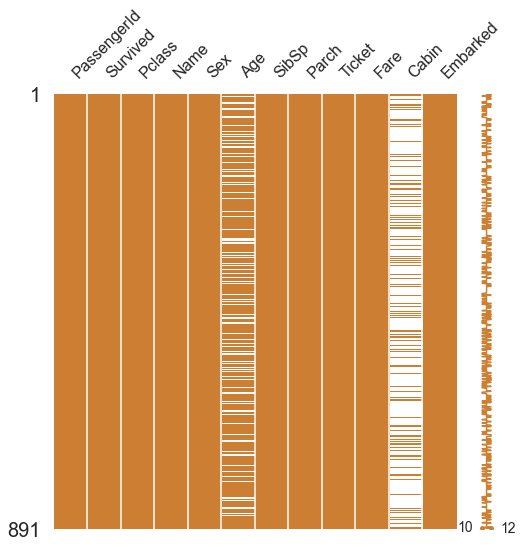

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

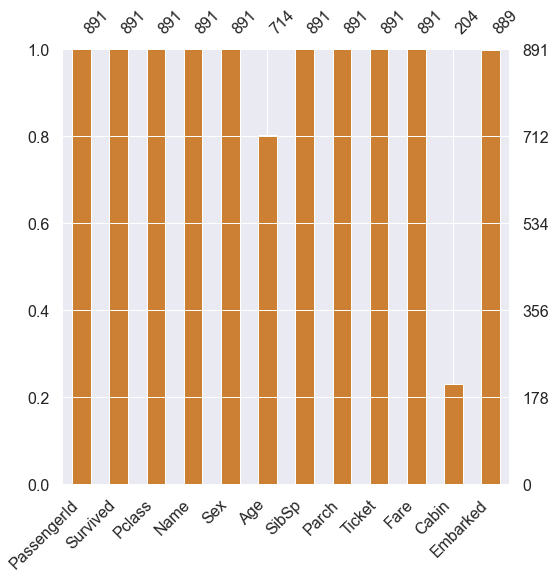

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

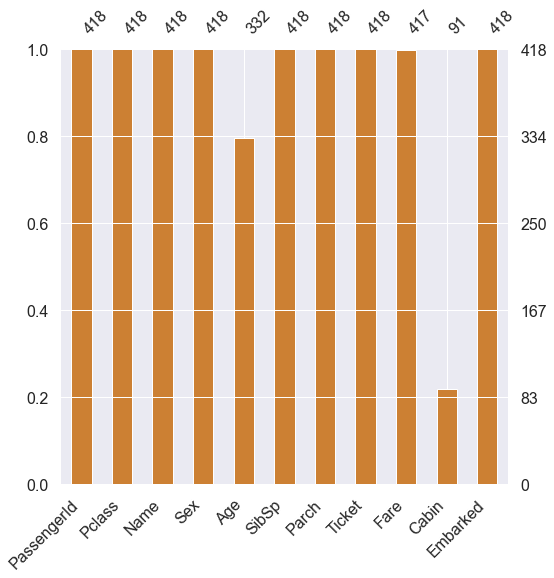

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2. Target Label 확인

Target Label이 어떤 분포(distribution)을 가지고 있는지 확인을 해야 한다. 즉, 클래스 별 여기서는 1과 0의 분포에 따라서 모델의 평가 방법이 달라질 수 있다.

여기서 쓴 `subplots`는 한 figure에 여러 개의 plot을 그리고 싶을 때 사용한다.

> **subplots(self, nrows=1, ncols=1, *)**
> - nrows : 행의 개수
> - ncols : 열의 개수
> - figsize : figure의 사이즈

`pie`는 pie 차트를 그릴 수 있는 함수이다.

> **pie(self, x, explode=None, autopct=None, shadow=False, *)**
> - explode : pie 조각이 돌출되는 크기. 여기서는 2반쩨 파이만 돌출.
> - autopct : pie 조각의 전체 대비 백분율. 소수점 첫째자리까지 표현.
> - ax : 대상 axe 객체
> - shadow : 그림자 효과 여부

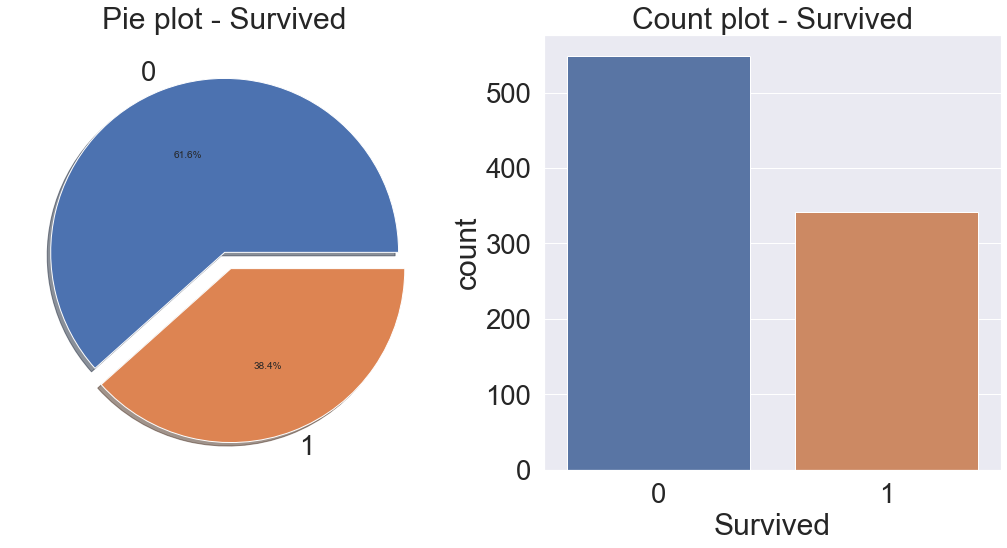

In [11]:
# 시각화를 위한 axe 객체 생성
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 1. Survived 피처만 된 Series를 추출
# 2. 각 value별 data의 개수를 구하여 Series로 반환
# 3. 그것을 pie 차트로 나타냄
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# Survived에 각 value별 데이터가 얼마나 있는지 표시
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

시각화된 것을 보면 약 **38.4%**만 살아남은 것을 볼 수 있다. 또한 target value가 한 쪽으로 쏠려있지 않고 꽤 균일하게(balanced) 되어 있는 것을 알 수 있다.

그럼 균일하지 않은게 왜 문제일까? 만약 100 중에 1이 99개, 0이 1개라고 하면, 모델을 어떤 input이 들어오든 1로 예측을 하게 되면 정확도는 99%가 나온다. 그래서 이럴 경우 다른 방법을 쓰거나 평가지표를 바꾸어야 한다.

## 2. Exploratory Data Analysis (EDA)

각 피처에 해당하는 본격적인 데이터 분석 단계. 시각화 라이브러리인 `matplotlib`, `seaborn`, `plotly` 등을 사용하여 분석한다.

> `💡 TIPS`   
> 특정 목적에 맞는 소스코드를 정리해두면 나중에 참고용으로 편하다!

### 2.1. Pclass

`Pclass`는 **카테고리이면서, 순서가 있는** 서수형(ordinal) 데이터이다. 이제 `Pclass`와 target인 `Survived`와의 관계를 살펴보자.
1. Pclass와 Survived를 가져와 `groupby`를 사용하여 Pclass를 기준으로 묶는다.
2. 그러면 Pclass마다 0과 1이 count가 되면서 각 Pclass 별로 생존자를 알 수 있다.

여기서 `groupby` 함수를 잠시 살펴보자. `groupby`는 데이터를 그룹 별로 분류할 때 사용한다. 여기서는 Pclass의 value를 기준으로 다른 피처 그룹 별로 분류를 한다. 그 후, GroupBy 객체 뒤에 `sum`, `mean`, `min` 등과  같은 그룹 연산 메서드를 붙여서 그룹 별로 연산을 가능하게 한다.
> **DataFrame.groupby(by=None, as_index=True)**
> * `by` : 어떤 그룹을 기준으로 할 것인지
> * `as_index` : 기준 그룹의 value를 인덱스로 지정할 것인지

In [12]:
# 생존 사망과 상관없이 각 클래스별 몇 명이 있는지
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# 생존자는 몇 명인지
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


이 때 pandas의 **crosstab**을 사용하면 위의 과정을 조금 더 수월하게 확인할 수 있다.

> **pandas.crosstab(index, columns, margins=False)**
> - index : row에서 그룹핑을 할 Series
> - columns : column에서 그룹핑을 할 Series
> - margins : 각 row와 column의 합을 나타낼건지 (subtotal)

참고로 pandas의 styling과 관련해서는 [여기](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)를 참고하세요!

In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


 각 클래스별로 `mean()` 메서드를 붙여주면 각 클래스별 생존류을 얻을 수 있다. class 1의 경우 생존률은 약 **0.63**이 되는 걸 알 수 있다. 즉, **Pclass가 좋을 수록 생존률이 높다.**
 
 > **DataFrame.sort_values(by, ascending=True)**
 > - `by` : 정렬 기준
 > - `ascending` : 정렬 순서 (높아지는 순 or 낮아지는 순)

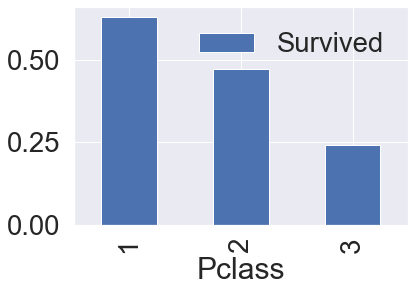

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar()

seaborn의 countplot으로 좀 더 보기 쉽게 그래프를 그려보자. 다음은 특정 label에 따른 개수를 나타낸 것이다. Pclass 1, 2, 3 순으로 **63%, 48%, 25%**로 Pclass가 생존률에 큰 영향을 미친다고 판단할 수 있다.

> `💡 TIP`    
> pandas에서는 Series나 Dataframe을 plot할 수 있게 해놓았다. 백엔드를 쓴다나? 약간 tensorflow에서 keras가 돌아가는 요런 느낌인 것 같은데.. 정확하지는 않다. 어쨌든, 기본적으로 matplotlib를 사용한다.

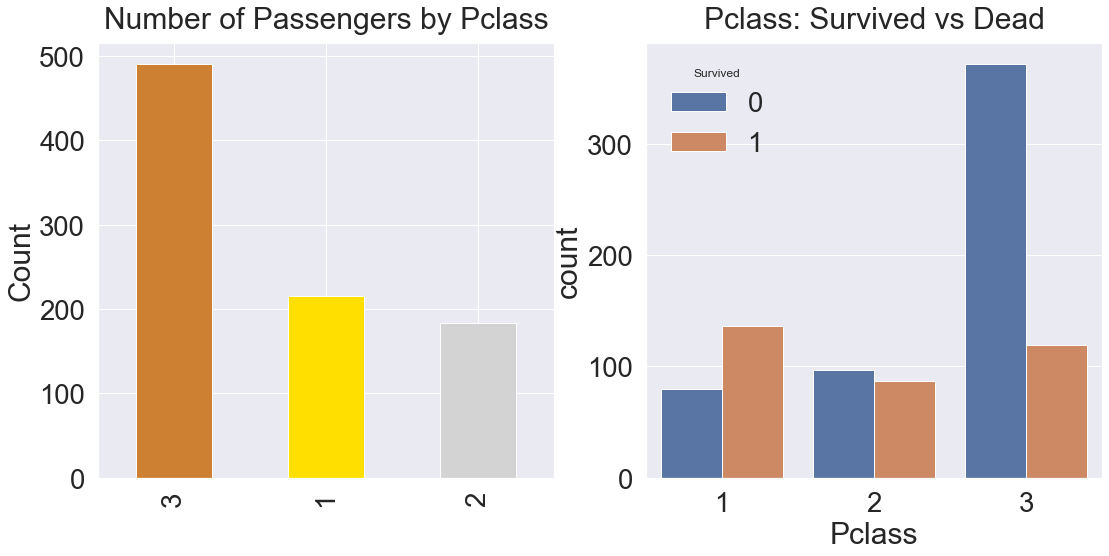

In [16]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 각 클래스별 오직 생존자 수만
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

# 각 클래스별 생존자/사망자 수
# hue는 각 클래스를 뭘로 구분할건지. 여기서는 생존자/사망자가 됨.
# 약간 조건부 확률처럼 받아들이면 됨. 예를 들어 class가 1일 때의 생존자/사망자수
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

### 2.2. Sex

이번에는 성별로 생존률이 어떻게 달라는지 확인해보자. Pclass와 마찬가지로 **groupby**와 **seaborn의 countplot**을 가지고 시각화해보면 다음과 같다.

이 때 **여자가 생존률이 더 높음**을 알 수 있다.

In [17]:
# 각 성별 생존률
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
# crosstab으로 나타낸 각 성별 생존자와 사망자
pd.crosstab(df_train['Sex'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


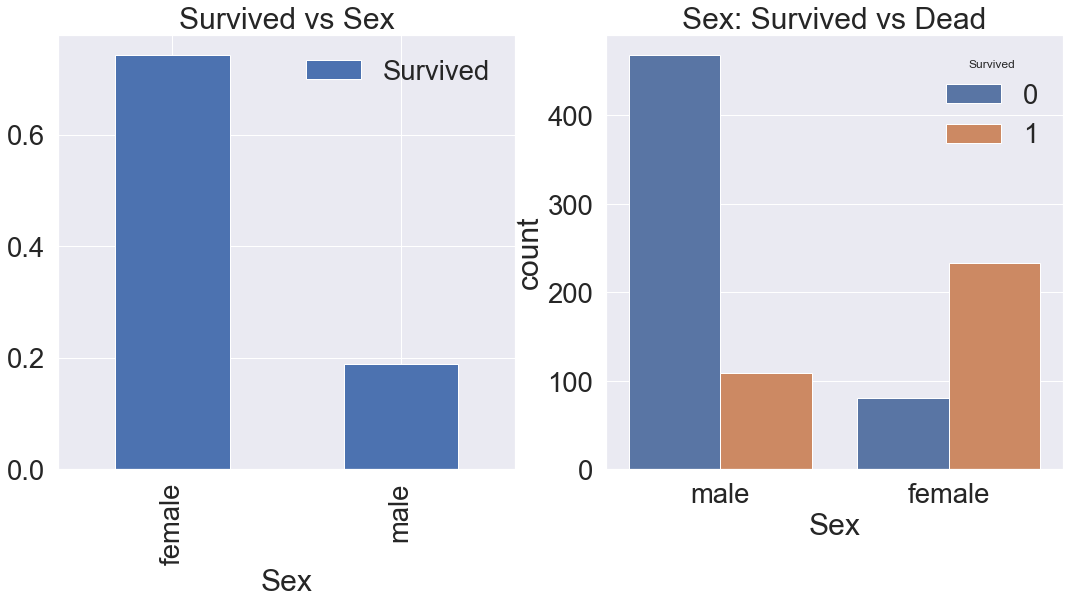

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 각 성별 생존자 수
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 각 성별 생존자/사망자 수
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

### 2.3. Both Sex and Pclass

이번에는 **Sex와 Pclass 두가지에 관해서 생존이 어떻게 달라지는지** 확인해보자. 이 때 seaborn의 `factorplot`을 이용하면 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수가 있다. `y`의 평균값을 나타내는데, `hue`로 지정된 피처의 종류수만큼 선이 그려진다. 여기서는 Sex인데 Sex는 남과 여 두가지이므로 선이 2개가 그려진다.

> **seaborn.factorplot(x=None, y=None, hue=None, data=None, height=5, aspect=1)**
> - `x`, `y` : x축, y축으로 나타낼 피처들
> - `hue` : 선으로 그릴 피처 (카테고리형 피처)
> - `col` : 각 value를 column으로 나눌 피처 (카테고리형 피처)
> - `data` : plot할 데이터셋(dataframe)
> - `height` : figure의 사이즈. 예전에는 `size` 였음.
> - `aspect` : figure의 가로세로 비율

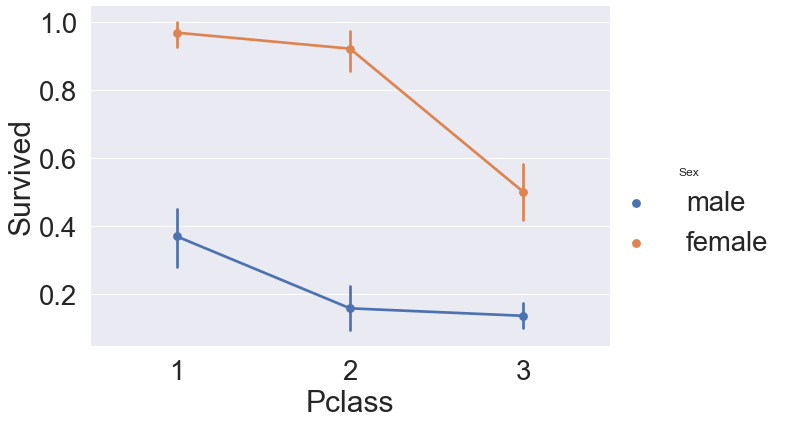

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex',
               data=df_train, size=6, aspect=1.5)

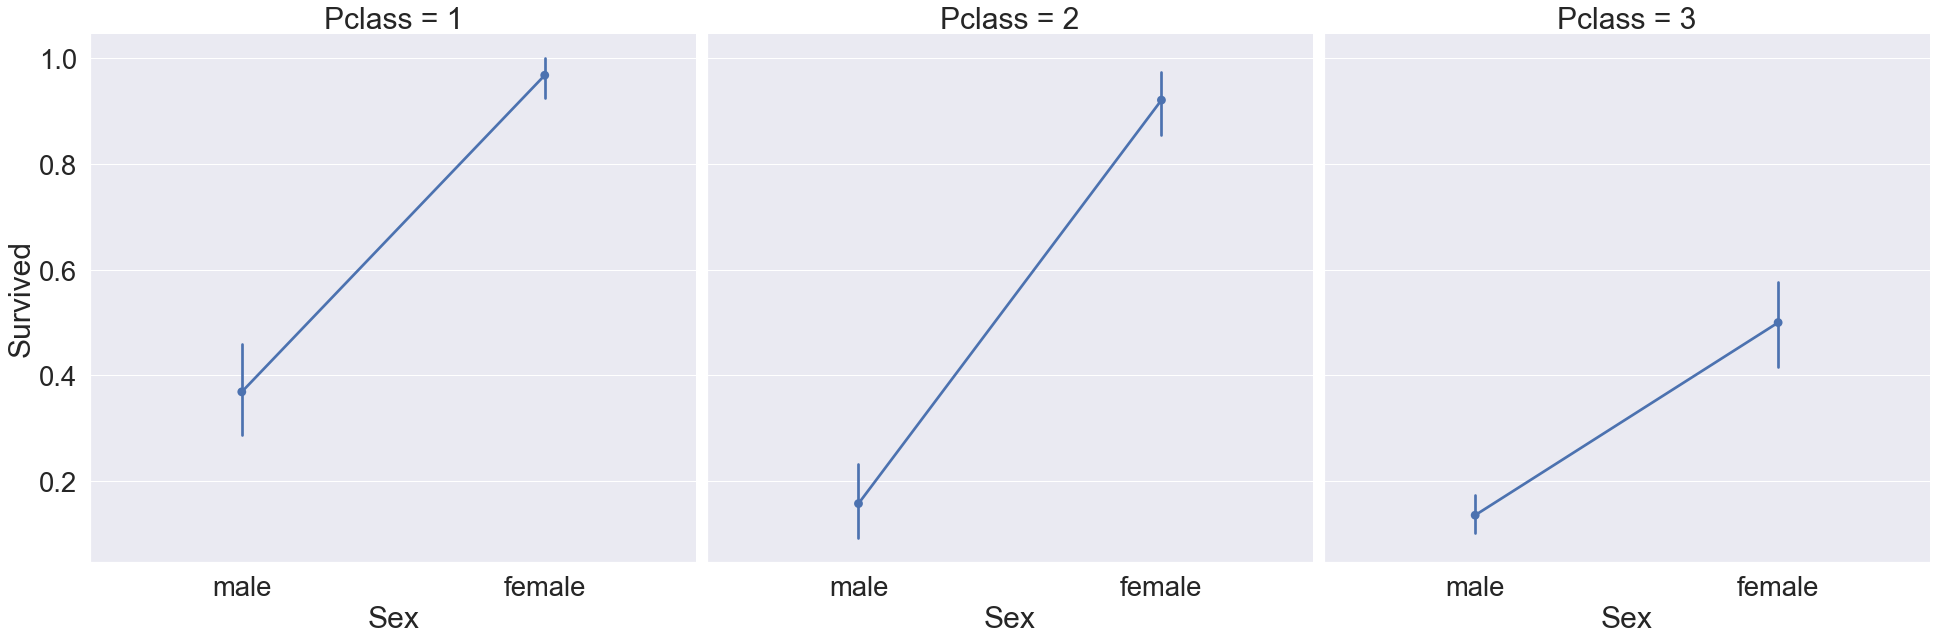

In [21]:
# saturation은 HSL 컬러의 S(채도)부분을 말함
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=df_train, saturation=0.5, size=9, aspect=1)

### 2.4. Age

이번에는 **나이와 생존률간의 관계**를 알아보자. 그 전에 `Age`는 연속된 수의 데이터이므로 그래프를 그려 대충 어느 쪽에 분포해야하는지 파악해야 한다.

In [22]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


kdeplot의 kde는 kernel density estimation의 약자로, **discrete한 value를 가진 데이터를 continuous하게 만들어주는 것**이다. 그래서 그래프가 끊김이 없고, 연속적으로 되어 있다. 정 아니면 우리가 아는 **확률밀도함수**를 떠올리면 된다.

> **seaborn.kdeplot(data)**
> - `data` : 입력데이터

아래의 그래프를 보면 **생존자 중 나이가 어린 사람이 많은 것**을 알 수 있다.

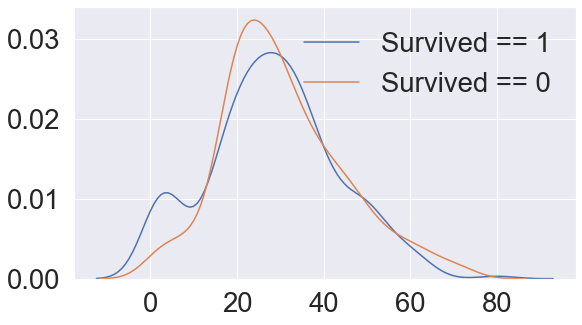

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))

# 생존자/사망자의 나이 분포
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

이번에는 `Age`와 `Pclass`와의 관계를 살펴보자.    
아래의 그래프를 보면 **Class가 높을 수록 나이가 많은 사람의 비중이 크다**는 것을 알 수 있다.

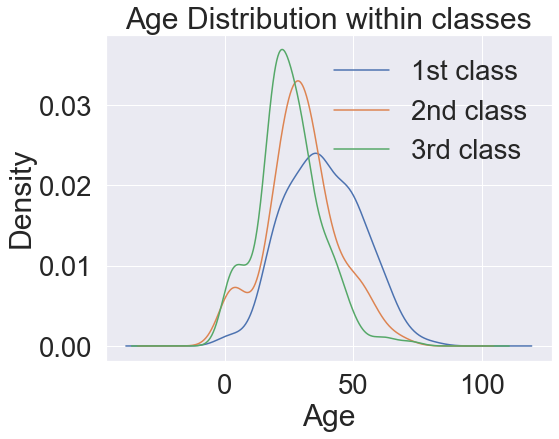

In [24]:
plt.figure(figsize=(8, 6))

# 클래스별 나이 분포
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

마지막으로 **나이의 범위를 넓혀가면서 생존률이 어떻게 되는지** 살펴보자. 즉, 0살부터 X살까지의 생존률을 보는 것이다.

결과는 **나이가 어릴수록 생존률이 높음**을 알 수 있다. `Age`도 생존률과 연관된 중요한 피처임을 확인!

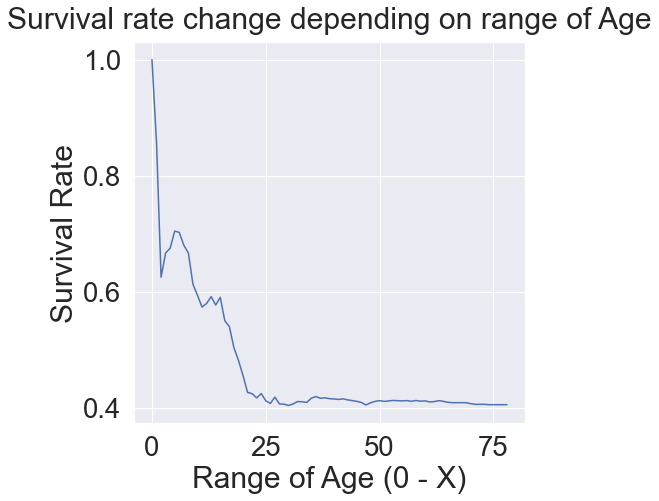

In [25]:
cummulate_survival_ratio = []

# 0살부터 i살까지의 생존률을 기록 누적
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum(
    ) / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)

plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age (0 - X)')

plt.show()

### 2.5. Pclass, Sex, Age

이번에는 Pclass, Sex, Age와 Survived의 연관성을 한 번에 봐보자. 이를 쉽게 그려주는 그래프는 **violinplot**이다. 

아래의 그래프에서 x축은 **우리가 나눠서 보고싶어 하는 피처(`Pclass`,`Sex`)**를, y축은 **보고 싶어하는 분포 distribution (`Age`)**를 말한다.

> **seaborn.violinplot(x=None, y=None, hue=None, data=None, scale='area', split=False, ax=None)**
> - `x`,`y`,`hue` : 우리가 plot하고자 하는 데이터셋의 Key
> - `data` : 데이터셋
> - `scale` : area(같은 면적), count(너비가 개수에 의해 결정), width(같은 너비)
> - `split` : hue가 binary할 때, 각 value별로 나눠서 보여주는지 말지
> - `ax` : axe 객체

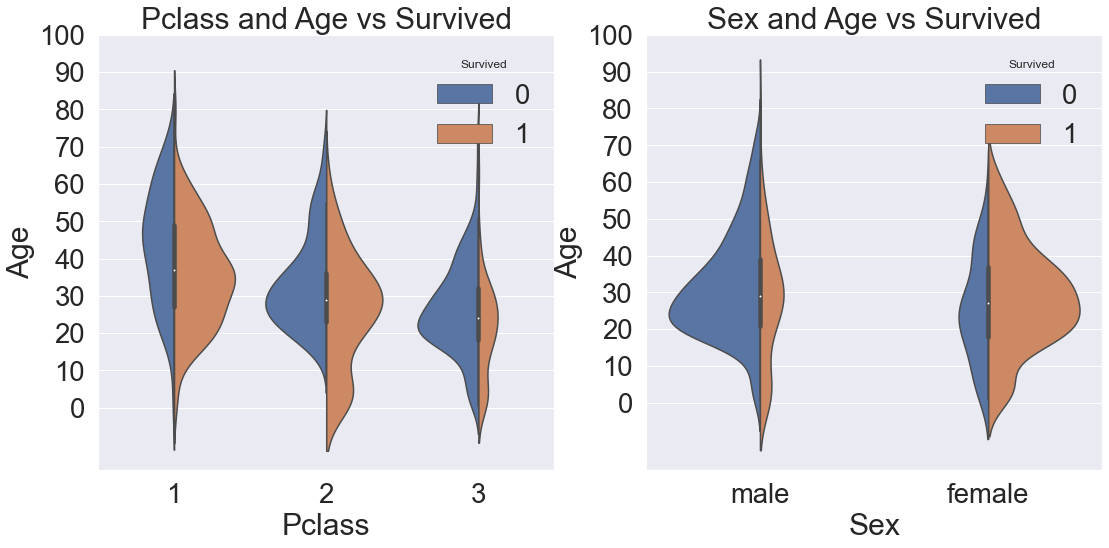

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# Pclass와 Age에서의 생존률 분포
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')    # 제목 설정
ax[0].set_yticks(range(0, 110, 10))              # y축 눈금 범위 설정

# Sex와 Age에서의 생존률 분포
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

왼쪽 그래프는 *Pclass 별로 Age의 분포는 어떻게 다른지, 거기에 생존 여부에 따라 구분한 그래프*이고, 오른쪽 그래프는 *Sex, 생존에 따른 Age 분포는 어떤지를 보여주는 그래프*이다.

* 생존만 보았을 때, **나이가 어릴수록 더 생존**했으며
* **여자일수록 더 생존**했음을 볼 수 있다.

즉, **여자와 아이**를 가장 먼저 챙겼음을 알 수 있다.

### 2.6. Embarked

`Embarked`는 탑승한 항구를 말한다. 위에서 했던 것과 마찬가지로 **탑승한 곳에 따른 생존률**을 보자.

> `💡 TIP`    
> Dataframe에 plot을 하면, axe객체를 반환하고, 거기에 `bar`, `hist`, `kde` 등을 붙이고, 매개변수는 matplot에서 했던 것처럼 비슷하게 해주면 그래프가 그려진 axe객체를 반환한다. 자세한 것은 [여기](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) 참고!

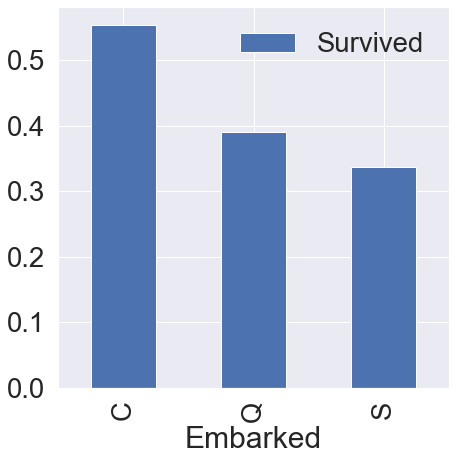

In [27]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

조금의 차이는 있으나 탑승한 곳에 따라 생존율이 극적으로 달라지지는 않는다.   
하지만 **C, Q, S순으로 생존률이 높으므로** 일단은 중요한 피처로 두고 사용할 예정이다.

마지막으로 **탑승한 곳에 따른 다른 피처들의 분포**를 살펴보면 다음과 같다.

Text(0.5, 1.0, '(4) Embarked vs Pclass')

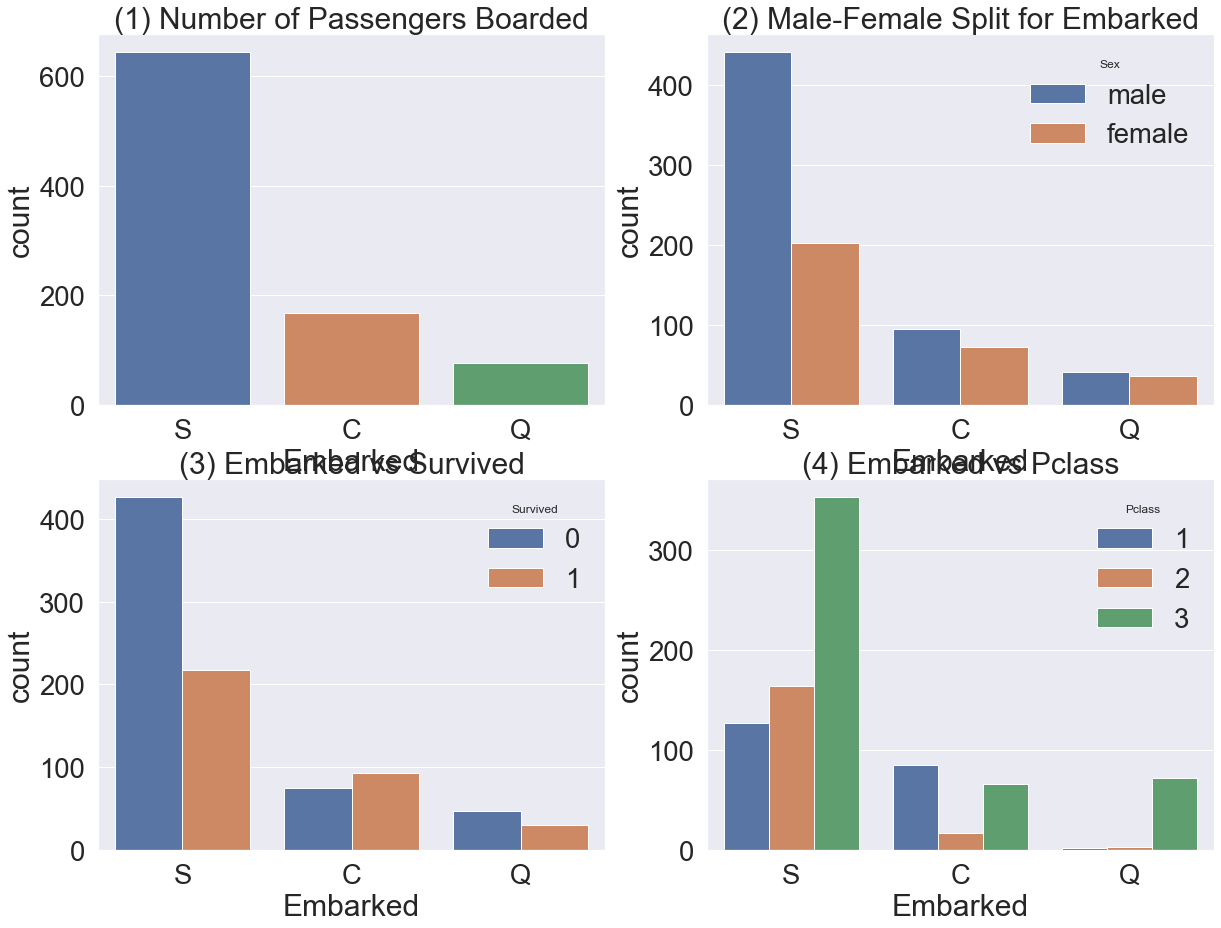

In [28]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# 탑승한 곳에 따른 사람 수
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) Number of Passengers Boarded')

# 탑승한 곳에 따른 성별 분포
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

# 탑승한 곳에 따른 생존률 분포
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

# 탑승한 곳에 따른 클래스 분포
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

* `Fig 1` : S 항구에서 사람이 가장 많이 탔다.
* `Fig 2` : C 항구와 Q 항구는 남녀의 비율이 비슷하지만, S 항구는 남자가 더 많이 탔다.
* `Fig 3` : S 항구에서 탄 사람이 생존률이 많이 낮다.
* `Fig 4` : C 항구에서의 생존률이 높은 이유는 클래스가 높은 사람이 많이 타서 그렇다.
    * S 항구는 낮은 클래스인 3이 많으므로 생존률이 낮다.

### 2.7. Family - SibSp, Parch

`SibSp`는 형제자매의 수, `Parch`는 부모자식의 수를 말한다. 이 2개를 합쳐서 `FamilySize`라는 새로운 피처를 만들어 보자.

In [29]:
# 1을 더하는 이유는 자기 자신까지 포함하기 위함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [30]:
print('Maximum size of Family :', df_train['FamilySize'].max())
print('Minimum size of Family :', df_train['FamilySize'].min())

Maximum size of Family : 11
Minimum size of Family : 1


**가족의 수와 생존률의 관계**를 살펴보자.

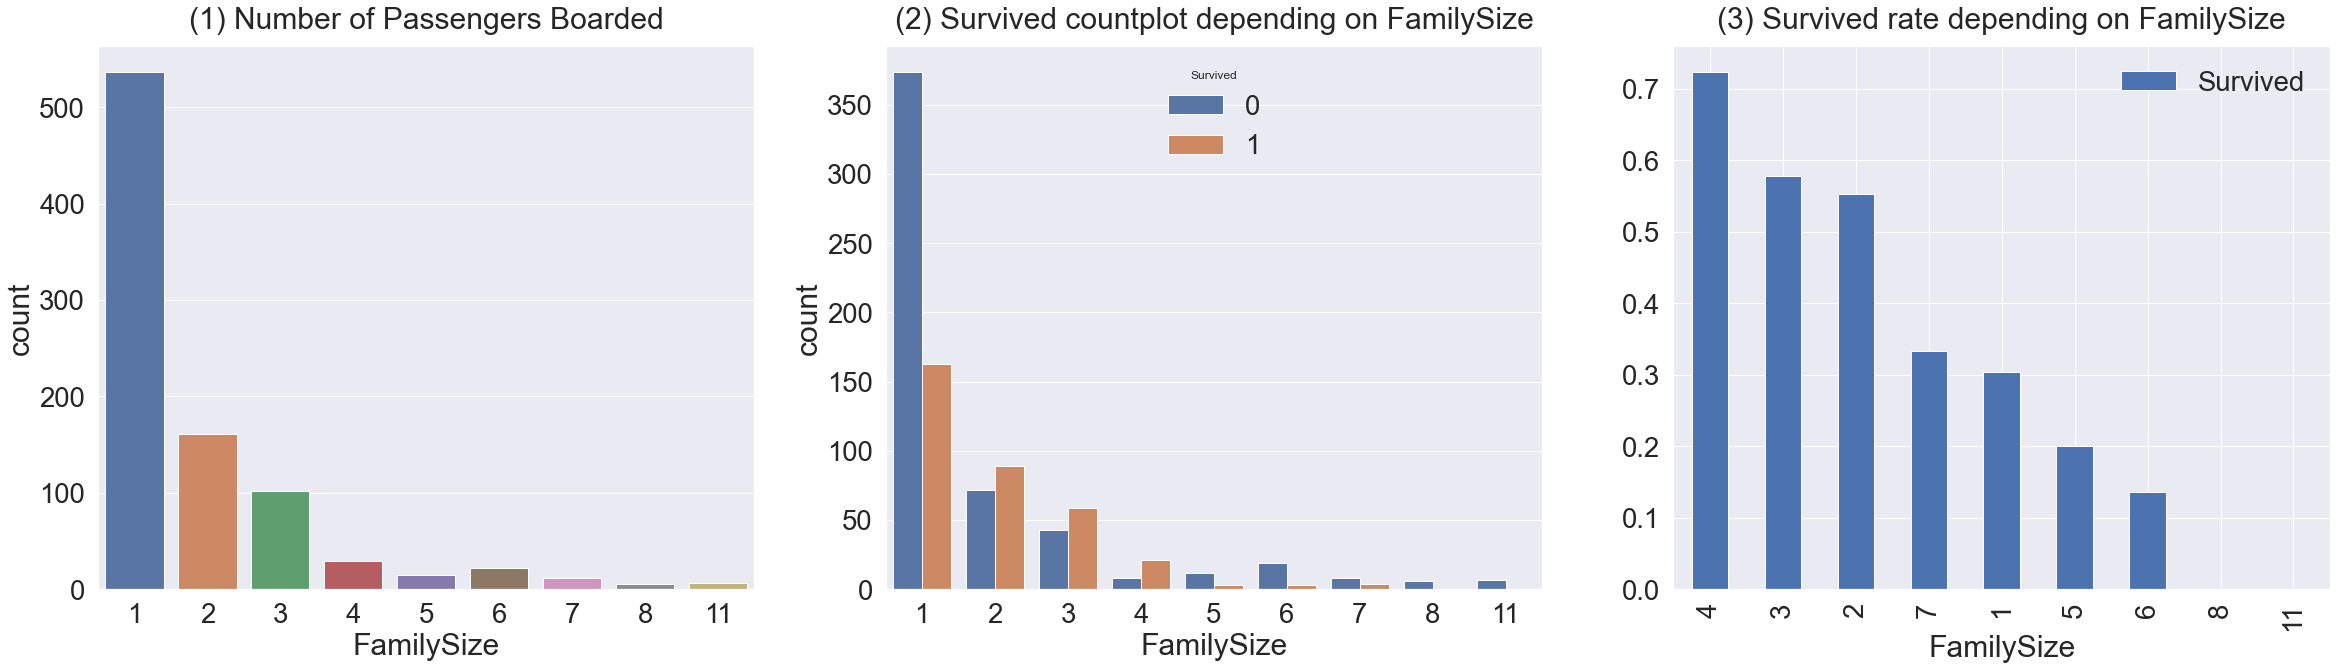

In [31]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

# 가족 수에 따른 분포
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) Number of Passengers Boarded', y=1.02)

# 가족 수에 따른 생존자 분포
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

# 가족 수에 따른 생존률
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

# subplot의 layout을 조정하는 함수
# 0.2, 0.5만큼의 공백을 가로, 세로에 넣어줌
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* `Fig 1` : 가족 크기가 1부터 11까지 있고, 대부분이 1명이고 그 다음으로 2, 3, 4명 가족 순으로 많다.
* `Fig 2` `Fig 3` : 가족이 4명인 경우 가장 생존확률이 높다.
    * 가족이 너무 크거나, 너무 작으면 생존 확률이 낮다.
    * 3, 4명 정도의 적당한 크기의 가족이 생존 확률이 높다.

### 2.8. Fare

Fare는 탑승요금으로, contious한 값을 가진 피처이다. 분포를 알기 위해 **histogam**을 그려보면 다음과 같다.

> **seaborn.distplot(a, color=None, label=None, ax=None)**
> - `a` : histogram을 그리고자 하는 Series
> - `color` : 지정 새
> - `label` : 범례 내용
> - `ax` : axe 객체

> `💡 TIP`    
> `skew`는 표본의 비대칭 정도를 말한다. 값이 양수로 높으면 왼쪽으로 치우져져있고, 값이 음수로 옾으면 오른쪽으로 치우쳐져있다. 더 정확히 이야기하자면, 중앙값을 기준으로 평균은 어디로 치우쳐져 있는지를 말한다.

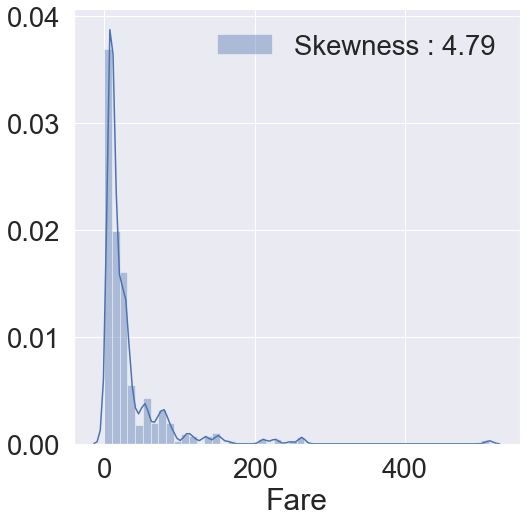

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

그래프를 보면 **분포가 매우 비대칭(high skewness)적임**을 알 수 있다. 이대로 데이터를 모델에 넣어주면, 자칫 모델이 잘못 학습을 할 수 있다. 몇 개 없는 outlier (여기서는 200이나 400)에 너무 민감하게 반응하면, 실재 예측할 때 좋지 못한 별과를 줄 수 있다.

그래서 outlier를 줄이기 위해 Fare에 `log`를 취해준다. 이 때 `apply` 혹은 `map`을 사용하면 손쉽게 값을 변형해줄 수 있다. 이 때 이 함수에 넣는 매개변수는 **함수**이다. 근데, 이걸 또 정의하기 귀찮으니 **lambda 함수**로 간단히 나타내면 유용하다!

In [33]:
# test 데이터셋에 있는 null 값들을 평균값으로 채워줌
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# log를 취해줌 왜? 비대칭이라서
# 이때 값이 0보다 작으면 그냥 0으로 해줌
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

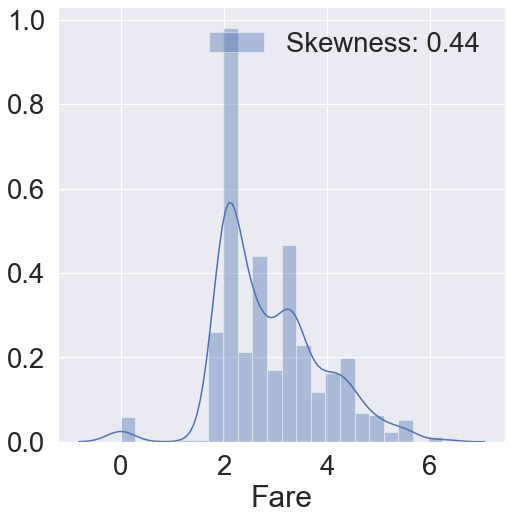

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(
    df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

`log`를 취하니 비대칭성이 많이 없어졌다. 이런 방식은 **feature engineering**이라고 하며, *모델의 학습을 위해 그리고 모델의 성능을 높이기 위해 피처들을 조작하거나, 새로운 피처를 추가하는 것*을 말한다.

### 2.9. Cabin

이 피처는 Null 값이 80%이므로, 모델 학습 시 제외시킨다.

In [35]:
df_train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

### 2.10. Ticket

이 피처는 string data이므로, 숫자가 아니라서 전처리를 하고 모델에 넣어주어야 한다.   
이것은 후에 **3. Feature Engineering**파트에서 더 설명할 예정!

In [36]:
df_train['Ticket'].value_counts()

1601         7
CA. 2343     7
347082       7
347088       6
CA 2144      6
            ..
345767       1
A/5 21173    1
330931       1
17463        1
349215       1
Name: Ticket, Length: 681, dtype: int64

## 3. Feature Engineering

null data는 무조건 채워야 한다. 그렇지만 아무 숫자로 채울 수 없고 해당 피처의 통계를 참고하는 등 여러 방식이 존재한다.
이 null data를 **어떻게 채워주느냐에 따라 모델의 성능이 좌지우지될 수 있기**에 꼭 신경을 써야 한다.

또한, feature engineering은 실제 모델의 학습에 쓰려고 하는 것이므로, **train 데이터셋 뿐만 아니라 test 데이터셋에도 똑같이 적용**을 해줘야 한다!

### 3.1. Fill Null

#### 3.1.1.Fill Null in Age using Title

Age에는 null data가 177개가 있다. 이 null 값을 채우기 위한 아이디어는 여러가지가 있는데 여기서는 **title과 statistics**를 이용해 볼 것이다.
* 영어에는 *Miss*, *Mr*, *Mrs*와 같은 title이 존재
* `str`과 정규식을 적용하여 추출해주는 `extract`를 사용하여 **Initial** 피처 생성

In [37]:
# Title 추출
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

이렇게 추출한 **Initial**과 **Sex**간의 관계를 `crosstab`을 사용해 살펴보자. 

In [38]:
# Initial과 Sex와의 관계
# 이 때 crosstab이 반환한 Dataframe을 Transpose 시킴
pd.crosstab(df_train['Initial'], df_train['Sex']
            ).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


위의 표를 보면 남자, 여자가 쓰는 **Initial**이 구분되어 있음을 볼 수 있다. 

이제 `replace`를 사용하여 특정 데이터의 값을 원하는 값을 바꿔준다. 여기서는 **Mr**, **Mrs**, **Miss**, **Other**로 구분할 것이다.

In [39]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], [
                            'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

In [40]:
df_train.groupby(by='Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


보면 여성과 관계가 있는 **Mrs**나 **Miss**의 생존률이 높음을 알 수 있다.

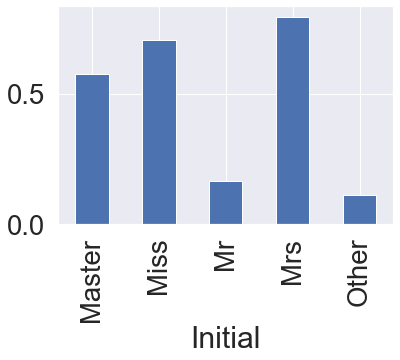

In [41]:
# Initial과 생존률의 관계
df_train.groupby(by='Initial')['Survived'].mean().plot.bar()

앞에서 말했다 싶이 null 값을 채워넣는 방법은 다양하다.
* `방법1` 통계적으로 분석해서 채우기
* `방법2` null 데이터가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채우기

그 중 우리는 **train_data를 통계적으로 분석**하여 null값을 채울 것이며, **train_data에서 얻은 통계를 기반으로 test_data도 똑같이 채워줄 것**이다. 단, 여기서 test_data에 관한 통계는 절대 사용되지 않는다! 헷갈리지 말것.

In [42]:
df_train.groupby(by='Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


그럼 어떤 값으로 채울 것이냐? 우리는 **Age의 평균**을 이용해 채울 것이다!

In [43]:
# Age에서 null값을 가지고 있고 'OO' 이니셜을 가진 사람의 나이 데이터
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Other'), 'Age'] = 46

# train데이터의 통계를 기반으로 test 데이터도 채워줌
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

평균 외에도 좋은 아이디어가 있다면 그러한 아이디어로 채우면 된다!

> `💡 TIP`   
> Kaggle의 노트북을 보면 참신한 방법으로 null 데이터를 채운 방법을 볼 수 있다! 

#### 3.1.2. Fill Null in Embarked

**Embarked**의 null data는 2개이고 **S**에서 가장 많은 탑승객이 있으므로, **S로 채울 것**이다.

> **Series.fillna(value=None, inplace=False)**
> - `value` : null data를 채울 값
> - `inplace` : 원본 데이터를 변화시킬 건지

In [44]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


In [45]:
df_train['Embarked'].fillna('S', inplace=True)

`isnull()`과 `any()`를 사용하여 null값이 채워졌는지 확인해보자.
`any()`는 boolean 값들 중 하나라도 True가 있으면 True를 반환하고, 없으면 False를 반환한다.

만약 제대로 채워졌다면 `isnull()`로 모두 False이므로 False가 반환되어야 한다.

In [46]:
df_train['Embarked'].isnull().any()

False

### 3.2. Change Age (continus to categorical)

Age는 연속적인 값을 가진 continuous feature이다. 지금 이대로 써도 되지만, 나이대를 나누어 **category화** 시켜줄 수 도 있다. 우리는 10살 단위로 나이를 grouping할 것이다.

다만, continous한 데이터를 categorical하게 바꿔주면 자칫 information loss가 생길 수 있으니 이 방법은 주의해서 쓸 것!

In [47]:
# 방법 1: loc를 사용하여 각각 카테고리화
df_train['Age_cat'] = 0

# 나이대에 따라서 0-7로 카테고리화
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

# test 데이터
df_test['Age_cat'] = 0

# 나이대에 따라서 0-7로 카테고리화
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [48]:
# 방법 2: apply함수를 사용
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7


df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

만약 두 가지 방법이 다 잘 적용이 되었다면, 같은 값이어야 한다.

이를 확인하기 위해 Series간 boolean 비교 후 `all()` 메소드를 사용해주면 된다. 모든 값이 같다면 `True`가 반환되고, 하나라도 다르면 `False`가 반환될 것이다.

> **DataFrame.all()**    
> - 해당 DataFrame의 값이 모두 True이면 True를 반환한다.

In [49]:
print('만약 둘 다 결과 가 같다면 True :', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

만약 둘 다 결과 가 같다면 True : True


결과는 True이므로 두 방식을 사용하여 만들어낸 값이 똑같다는 것을 알 수 있다.    
이제 중복되는 **Age**와 **Age_cat_2** 피처를 삭제하자!

> **DataFrame.drop(labels=None, axis=0, inplace=False)**
> - `labels` : 삭제하고자 하는 인덱스 혹은 column (key값 하나나 리스트)
> - `axis` : 0이면 인덱스, 1이면 column을 drop
> - `inplace` : 원본 데이터에 반영할건지

In [50]:
# 중복되는 column 삭제
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

### 3.3. Change Initial, Embarked and Sex (string to numerical)

모델에 string을 넣어주면 인식할 수 없으므로, 컴퓨터가 인식할 수 있는 **숫자**로 변환 시켜줘야 한다. 

그 전에 특정 column에 어떤 값이 있는지 알고 싶으면 `unique()`를 써서 유일값들의 리스트를 얻거나, `value_counts()`로 각 value의 count까지 알 수 있다.

> **Series.unique()**
> - 유일값들을 numpy ndarray로 반환

In [51]:
# Initial feature
df_train['Initial'] = df_train['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [52]:
# Embarked feature
print("Embarked Unique Value :", df_train['Embarked'].unique())
print("Emarked Unique Value Count :\n", df_train['Embarked'].value_counts())

df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

Embarked Unique Value : ['S' 'C' 'Q']
Emarked Unique Value Count :
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [53]:
# sex feature
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

마지막으로 **각 피처 간의 상관 관계**를 살펴보자. 두 피처 간의 Pearson Correlation을 구하면 `(-1, 1)` 사이의 값을 얻을 수 있다.

$$r_{xy} = \frac{Cov(x,y)}{S_{x}S_{y}} = \frac{\frac{1}{n-1}\sum_{i=1}^n(x_{i}-\bar x)(y_{i}-\bar y)}{S_{x}S_{y}}$$

* `-1` : 음의 상관관계
* `1` : 양의 상관관계
* `0` : 아무 상관이 없음

이렇게 구한 상관관계를 **heatmap plot**을 쓰면 matrix 형태로 편하게 볼 수 있다. 이 때 `corr()` 메서드와 `seaborn`을 사용하여 그리면 된다. `corr`은 pandas에서 제공하는 함수로 Dataframe에서 호출하면, 알아서 피어슨 상관계수 테이블을 만들어준다.

> **seaborn.heatmap(data, vmax=None, cmap=None, annot=None, annot_kws=None, linewidths=0, linecolor='white', square=False)**
> - `data` : 직사각형 행렬 데이터. 여기서는 pd의 `corr`을 사용하여 만듦.
> - `vmax` : value 최대값 지정
> - `linewidths` : cell 사이의 간격
> - `cmap` : 컬러맵
> - `annot` : cell 안에다가 value를 쓸건지
> - `annot_kws` : annot가 True일 경우 annot안의 text config값
> - `square` : 정사각형 형태로 할건지
> - `linecolor` : cell 사이 간격의 색

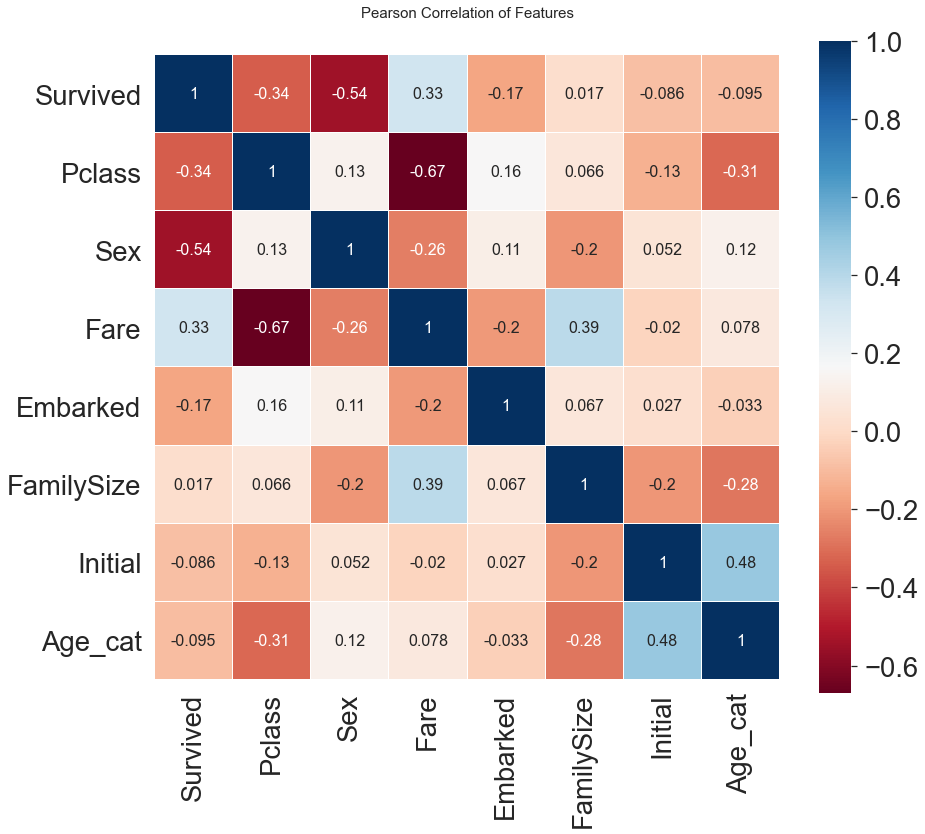

In [54]:
# 상관관계를 볼 데이터 추출
heatmap_data = df_train[['Survived', 'Pclass', 'Sex',
                         'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

# colormap 변수 저장
colormap = plt.cm.RdBu

# heatmap 그리기
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

# 추출했던 데이터 삭제
del heatmap_data

* Survived 부분만 보면 **Sex와 Pclass가 Survived와 어느 정도 상관이 있음**을 알 수 있다.
* **Fare와 Embarked도 조금의 상관관계가 있음**을 알 수 있다.
* 서로 강한 상관 관계를 가지는 피처들은 존재하지 않는다.
    * 이 말은 **이 데이터에는 불필요한 피처가 없음**을 말한다.
    * 만약 서로의 상관계수가 1 혹은 -1인 피처 두 개가 있다면 둘 중 하나면 사용하면 되기 때문이다.

### 3.4. One-hot encoding on Initial and Embarked

수치화시킨 카테고리를 그냥 넣어도 되지만, 더더 성능을 높이기 위해서 **one-hot encoding**을 해줄 수 있다. **hot encoding**이란 **카테고리 개수만큼의 차원을 가진 벡터를 만들어 값에 해당하는 부분의 차원만 1로 표현하는 것**을 말한다. 

이를 쉽게 하기 위해 pandas의 `get_dummies` 함수를 사용하면 된다. 이 함수는 카테고리의 개수만큼의 column을 생성해준다. 이 때 `prefix`를 주어 구분을 쉽게 해줄 수 있다. 

> **pandas.get_dummies(data, prefix=None, columns=None)**
> - `data` : dummy 데이터를 만들 dataframe
> - `columns` : encoding할 피처
> - `prefix` : 새로 생성할 column에 붙는 접두어

In [55]:
# Initial encoding
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [57]:
# embarked encoding
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [58]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


이 외에 **sklearn의 `Labelencoder`와 `OneHotencoder`**를 이용해서 encoding이 가능하다.

다만 카테고리가 100개가 넘는 경우 one-hot encoding을 사용하면 학습이 매우 버거울 수 있으므로 이 때는 다른 방법을 사용해야 한다.

### 3.5. Drop Columns

이제는 쓸데 없는 피처를 지우는 단계! 학습 시 필요가 없는 피처들을 지우면 된다.

In [59]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
               'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
              'Ticket', 'Cabin'], axis=1, inplace=True)

In [60]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [61]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


## 4. Building Model and Prediction using the Trained Model

* `sklearn`은 feature engineering부터 preprocessing, 지도 학습 알고리즘 등 머신러닝과 관련된 모든 작업이 인터페이스로 손쉽게 구현이 되어 있다.
* 타이타닉 문제는 target class가 있으며, 이 class는 0과 1로 이루어져 있으므로 **binary classification** 문제이다.

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 4.1. Preparation - Split dataset into train, valid, test set

가장 먼저 해야할 일은 target label인 **Survived**를 데이터셋에서 분리시키는 것이다. 간단히 `drop`을 사용하여 분리시키면 된다.

> **pandas.DataFrame.values**
> - dataframe에서 value값만 추출해 반환한다.

In [63]:
# target 클래스를 데이터셋에서 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

test 데이터로 예측을 하기 전에 모델이 잘 학습이 되었는지 알기 위해 valid 데이터를 따로 만들어 학습 후 검증하는 데 사용한다.

이것은 `train_test_split`을 사용하여 쉽게 분리할 수 있다.

In [64]:
# train 데이터와 valid 데이터로 분리
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2020)

### 4.2. Model Generation and Prediction

여기서는 여러 결정 트리들을 앙상블한 모델인 **Random Forest**를 사용할 것이다. 이 알고리즘은 `n_estimators`, `max_features`, `max_depth` 등 여러 파라미터가 본재하며 이 값에 따라 모델의 성능이 달라질 수 있다.

이렇게 파라미터들을 조절하는 것을 **파라미터 튜닝**이라고 하며 값을 계속 바꿔가면서 최적의 값을 알아낼 수 있다.

In [65]:
# random forest 모델 생성
model = RandomForestClassifier()
model.fit(X_tr, y_tr)    # 학습
prediction = model.predict(X_vld)    # 예측

In [66]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞췄다!'.format(
    y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도로 생존을 맞췄다!


### 4.3. Feature Importance

학습된 모델은 **feature importance**를 갖게 되는데, 이걸로 **모델이 어떤 feature에 영향을 많이 받았는지**를 확인할 수 있다!

학습된 모델은 기본적으로 feature importances를 갖고 있어서 쉽게 얻을 수 있으며, pandas의 `Series()`를 이용하여 쉽게 정렬이 가능하다.

In [67]:
from pandas import Series

# feature importance 추출
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

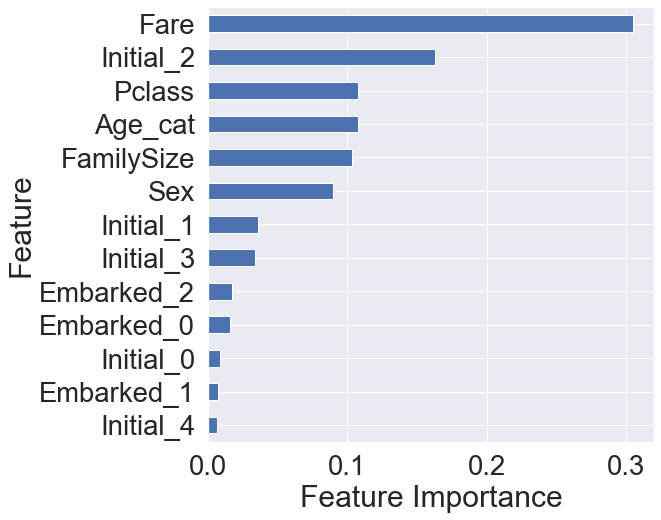

In [68]:
# feature importance 시각화
plt.figure(figsize=(8,8))
# 수평으로 뻗는 bar plot
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

여기서 우리가 알 수 있는 사실은..

* `Initial_2`, `Age_cat`, `Pclass` 순으로 가장 큰 중요도를 가진다.
* 다른 모델을 사용하게 되면 다른 feature importance를 가질 수 있다.
* 현재로써는 `Fare`가 가장 중요하다고 생각할 수 있지만, 다른 모델에서 다르게 나올 수 있으므로 통계적으로 더 살펴보아야 한다.
* feature importance를 가지고 **더 정확도가 높은 모델을 얻기 위해 feature selection**을 하거나 **좀 더 빠른 모델을 위해 feature 제거**를 할 수 있다.

### 4.4. Prediction on Test Set

정말 마지막 단계! 이제 학습에 사용되지 않은 `test_data`를 사용하여 실제 생존여부를 예측해보자. 

예측 결과는 `submission.csv`에 저장하여 제출 할 수 있다.

In [69]:
# submission 파일 불러오기
submission = pd.read_csv('../data/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [70]:
# 예측 후 submission 파일에 저장
prediction = model.predict(X_test)
submission['Survived'] = prediction
submission.to_csv('../data/youhanlee_submission_1.csv', index=False)

## References
- [HONG_YP : missingno를 이용하여 결측치를 시각화해보기](https://hong-yp-ml-records.tistory.com/14)    
- [데이터사이언스스쿨 : 누락데이터 처리](https://datascienceschool.net/view-notebook/8cbbdd4daaf84c0492d440b9a819c8be/)   
- [데이터사이언스스쿨 : Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)    
- [데이터사이언스스쿨 : 시각화 패키지 Matplotlib 소개](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/)   
- [데이터사이언스스쿨 : 데이터프레임의 데이터 조작](https://datascienceschool.net/view-notebook/aa62265f02fc429aa636ef343c3b1fda/)  
- [Matplotlib Tutorial : Pie Chart](https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.html)
- [옥수별 : 파이 차트 그리기](https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220755238265&proxyReferer=https:%2F%2Fwww.google.com%2F)
- [PinkWink : kdeplot](https://pinkwink.kr/984)